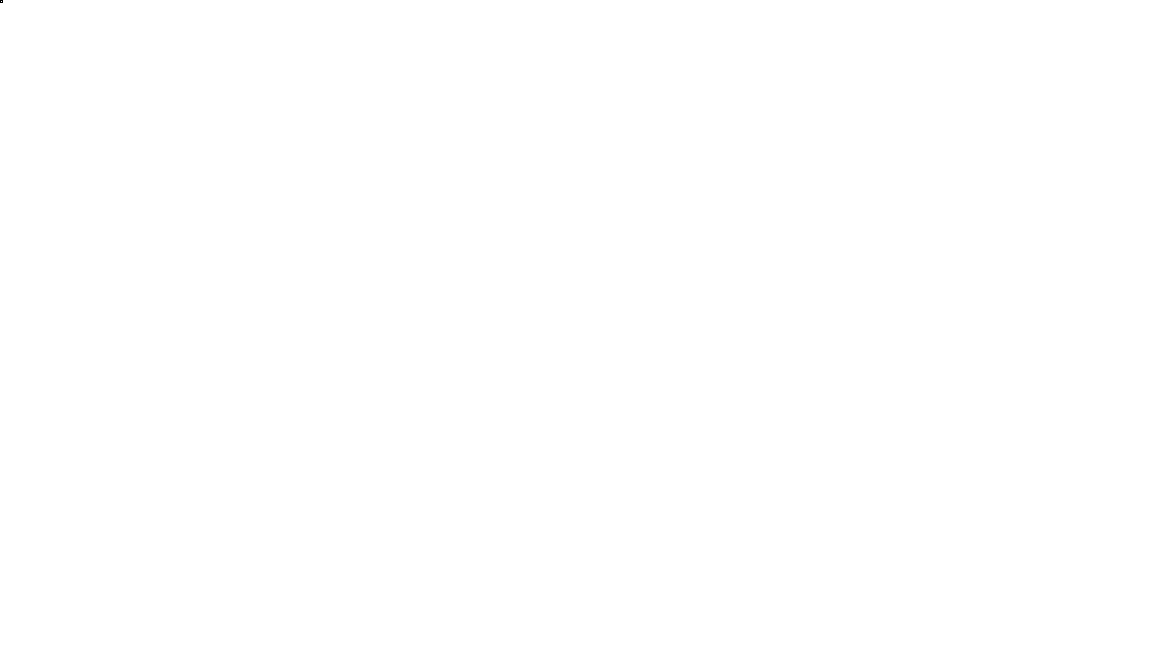

In [7]:
import numpy as np
from PIL import Image
img = Image.open('sample.bmp')
#np.array(img)
img.getpixel((1,1))  
pix_arr = np.array(img)
Image.fromarray(pix_arr)

In [18]:
def save_image(image,path):
    image.save(path,'png')

# Create a new image with the given size
def create_image(i,j):
    image = Image.new("RGB",(i,j),"white")
    return image

# Get the pixel from the given image
def get_pixel(image,i,j):
    # Inside image bounds?
    width, height = image.size
    if i > width or j > height:
        return None
    
    # Get Pixel
    pixel = image.getpixel((i,j))
    return pixel

gray = Image.new('L',(5,5),'black')
gray.putpixel((0,2),255)


(255, 255, 255)


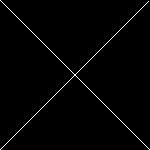

In [21]:
gray = Image.new('L',(150,150))
width, height = gray.size

for x in range(width) :
    gray.putpixel((x,x), (255))
a = 0
for x in range(width-1,0,-1) :
    gray.putpixel((a,x), (255))
    a = a + 1
    
gray

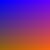

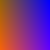

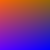

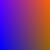

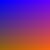

In [60]:
cimg = Image.new('RGB',(50,50),'blue')
w, h = cimg.size

for y in range(h):
    for x in range(w):
        cimg.putpixel((x,y),(x*2+y*3,y*2,255-(y*5),255))
display(cimg)
for i in range(4):
    cimg = cimg.rotate(-90)
    display(cimg)

Training Samples: 60000
Testing Samples: 10000
Height: 28 x Width:28
Epoch 1/10
300/300 [==============================] - 74s 242ms/step - loss: 0.5487 - accuracy: 0.8377 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 2/10
300/300 [==============================] - 71s 238ms/step - loss: 0.0647 - accuracy: 0.9796 - val_loss: 0.0380 - val_accuracy: 0.9881
Epoch 3/10
300/300 [==============================] - 75s 249ms/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 4/10
300/300 [==============================] - 80s 267ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0243 - val_accuracy: 0.9918
Epoch 5/10
300/300 [==============================] - 75s 249ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0246 - val_accuracy: 0.9924
Epoch 6/10
300/300 [==============================] - 76s 252ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0247 - val_accuracy: 0.9915
Epoch 7/10
300/300 [==============================] - 75s 252

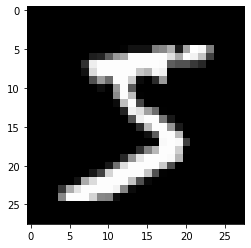

In [64]:
#Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#Importing the CNN related layers as described in Chapter 2
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
#Loading data from Keras datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Defining the height and weight and number of samples
#Each Image is a 28 x 28 with 1 channel matrix
training_samples, height, width = x_train.shape
testing_samples,_,_ = x_test.shape
print("Training Samples:",training_samples)
print("Testing Samples:",testing_samples)
print("Height: "+str(height)+" x Width:"+ str(width))

#Lets have a look at a sample image in the training data
plt.imshow(x_train[0],cmap='gray', interpolation='none')
#We now have to engineer the image data into the right form
#For CNN, we would need the data in Height x Width X Channels
#form Since the image is in grayscale, we will use channel = 1
channel =1
x_train = x_train.reshape(training_samples, height,
width,channel).astype('float32')
x_test = x_test.reshape(testing_samples, height, width,
channel).astype('float32')
# To improve the training process, we would need to standardize
# or normalize the values We can achieve this using a simple
# divide by 256 for all values
x_train = x_train/255
x_test =x_test/255
#Total number of digits =10
target_classes = 10
# numbers 0-9, so ten classes
n_classes = 10
# convert integer labels into one-hot vectors
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
#Designing the CNN Model
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(height,width ,1),
activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=10, batch_size=200)

In [67]:
metrics = model.evaluate(x_test, y_test, verbose=0)
for i in range(0,len(model.metrics_names)):
    print(str(model.metrics_names[i])+" = "+str(metrics[i]))

loss = 0.022928541526198387
accuracy = 0.9927999973297119


675 번째 테스트용 샘플:


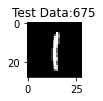

실제: 1
예측결과: 1 

833 번째 테스트용 샘플:


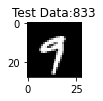

실제: 9
예측결과: 9 

961 번째 테스트용 샘플:


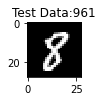

실제: 8
예측결과: 8 



In [109]:
for i in range(3):
    pick = np.random.randint(0,1000)
    print(pick,'번째 테스트용 샘플:')
    plt.rcParams["figure.figsize"] = (1,1)
    plt.imshow(x_test[pick],cmap='gray', interpolation='none')
    plt.title(f'Test Data:{pick}')
    plt.show()
    print('실제:',np.argmax(y_test[pick]))
    print('예측결과:',np.argmax(model.predict(x_test[pick].reshape(1,28,28,1))),'\n')

실제: 0   예측결과: 0
실제: 1   예측결과: 1
실제: 2   예측결과: 2
실제: 3   예측결과: 3
실제: 4   예측결과: 4
실제: 5   예측결과: 5
실제: 6   예측결과: 6
실제: 7   예측결과: 7
실제: 8   예측결과: 8
실제: 9   예측결과: 4


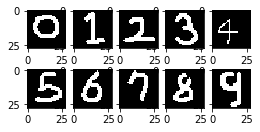

In [156]:
from matplotlib import pyplot

for i in range(10):
    pyplot.subplot(2,5,i+1)
    
    img = Image.open(str(i)+'.bmp')
    
    plt.rcParams["figure.figsize"] = (4,4)
    pix_arr = np.array(img)
    plt.imshow(pix_arr,cmap='gray', interpolation='none')
    pred = np.argmax(model.predict(pix_arr.reshape(1,28,28,1)))
    print('실제:',i,'  예측결과:',pred)
plt.show()


In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
for i in range(9):
    pyplot.subplot(331+i)
    filename = folder+'dog.'+str(i)+'.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()